In [1]:
import pandas as pd
import re
import numpy as np
import joblib
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
%matplotlib inline 
from wordcloud import WordCloud

In [2]:
columns=['tweet_english','label']
df = pd.read_excel(r'C:\Users\Hp\TUGAS AKHIR 2\data_twitter.xlsx', usecols=columns)
df = df.replace(r'^\s*$', np.nan, regex=True)
df.head()

,tweet_english,label
0,"['sis',' lutfi ',' matter ',' compensated ',' ...",positive
1,"['min', 'why', ""]",negative
2,"['indihome', 'flop', 'really', 'roll', 'loadin...",positive
3,"['please', 'check', '']",negative
4,"['connect', 'lan', 'ps', 'how', 'sis', 'fail']",negative


In [3]:
df['polaritas'] = df.label.map({'positive':1, 'negative':-1})
df

,tweet_english,label,polaritas
0,"['sis',' lutfi ',' matter ',' compensated ',' ...",positive,1
1,"['min', 'why', ""]",negative,-1
2,"['indihome', 'flop', 'really', 'roll', 'loadin...",positive,1
3,"['please', 'check', '']",negative,-1
4,"['connect', 'lan', 'ps', 'how', 'sis', 'fail']",negative,-1
...,...,...,...
22502,"['activated', 'card', 'already', 'scorched', '...",negative,-1
22503,"['sis',' help ',' hook ',' product ',' service...",positive,1
22504,"['', 'fertilizer', 'indonesia', 'persero', 'pr...",negative,-1
22505,"['hi', 'sis',' princess', 'sorry', 'access',' ...",negative,-1


In [4]:
x = np.array(df['tweet_english'].transpose())
y = df['polaritas']
print (x.shape)
print (y.shape)

(22507,)
(22507,)


In [5]:
#vektorisasi
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(x)
print(x.shape)

(22507, 16267)


In [6]:
#splitting dataset ke dalam train dan test data (80 : 20)

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42)

print ('\n total data train : ', ytrain.shape)
print ('\n total data test : ', ytest.shape)


 total data train :  (18005,)

 total data test :  (4502,)


In [7]:
print(xtrain.shape)
print(ytrain.shape)

(18005, 16267)
(18005,)


In [8]:
#klasifikasi data (80 : 20)
nb = MultinomialNB()

#memasukkan data training ke dalam klasifikasi naive bayes
nbtrain = nb.fit(xtrain, ytrain)

#melakukan prediksi dari data test
predicted = nbtrain.predict(xtest)
predicted

array([-1, -1, -1, ..., -1,  1,  1], dtype=int64)

In [9]:
#Menentukan probabilitas hasil prediksi
nbtrain.predict_proba(xtest)

array([[0.86109243, 0.13890757],
       [0.88984694, 0.11015306],
       [0.8821679 , 0.1178321 ],
       ...,
       [0.61433921, 0.38566079],
       [0.3965338 , 0.6034662 ],
       [0.15937067, 0.84062933]])

In [10]:
print(accuracy_score(ytest, predicted))

0.842958685028876


In [11]:
print(classification_report(ytest, predicted))

              precision    recall  f1-score   support

          -1       0.83      0.98      0.90      3211
           1       0.92      0.50      0.64      1291

    accuracy                           0.84      4502
   macro avg       0.87      0.74      0.77      4502
weighted avg       0.85      0.84      0.83      4502



In [12]:
Final = df[['tweet_english', 'label', 'polaritas']]
Final = Final.rename(columns={'tweet_english':'Tweets', 'label':'Label', 'polaritas':'Polaritas'})
Final.to_excel('hasil_analisis_twitter.xlsx')

In [13]:
cnf_matrix = metrics.confusion_matrix(ytest, predicted)
cnf_matrix

array([[3154,   57],
       [ 650,  641]], dtype=int64)

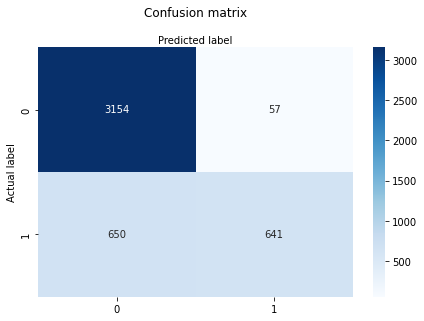

In [14]:
class_names=[-1,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [15]:
wordcloud = pd.Series(" ".join(df["tweet_english"]).split())
len(wordcloud)

279184

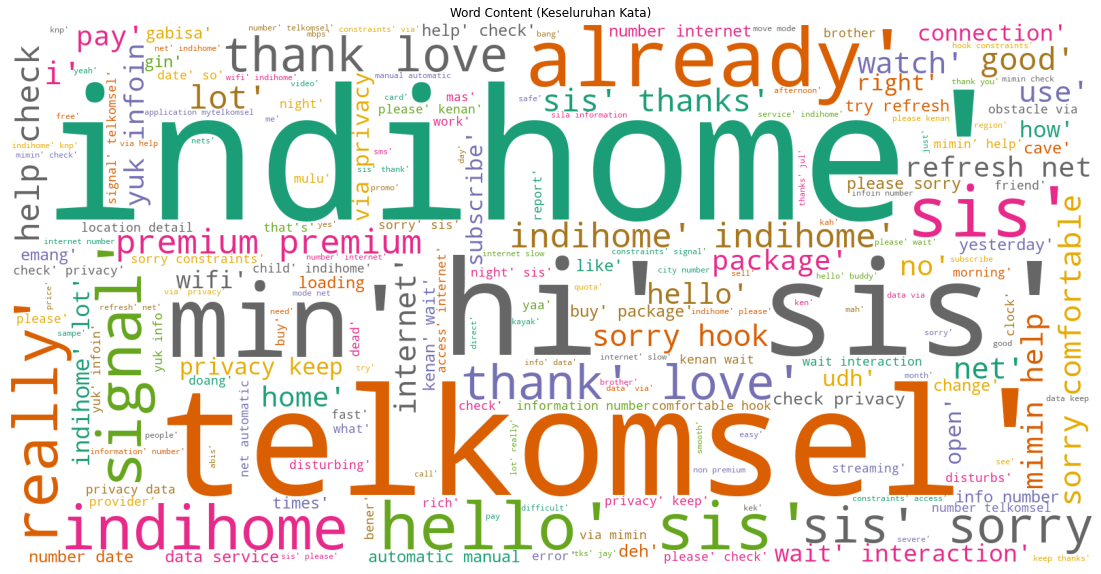

In [16]:
datacloud = " ".join(wordcloud)

%matplotlib inline
# Bigram (per dua kata) -> "collocations = True"
wordcloud_cld = WordCloud(background_color = "white", mode = "RGB", width = 1600, height = 800, colormap = "Dark2").generate(datacloud)
plt.figure(figsize = (20, 10))
plt.title("Word Content (Keseluruhan Kata)")
plt.imshow(wordcloud_cld)
plt.axis("off")
plt.show()

In [17]:
label_score = df["label"].value_counts()
label_score

negative    16015
positive     6492
Name: label, dtype: int64

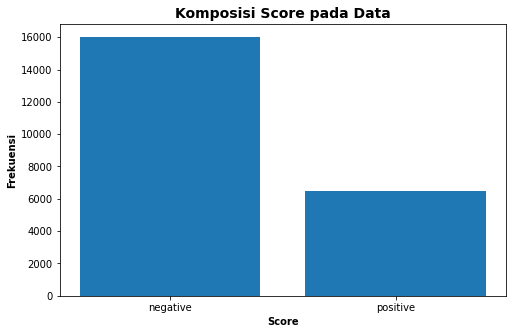

In [18]:
label_score_x = label_score.index
label_score_y = label_score.values

plt.figure(figsize = (8, 5))
plt.bar(label_score_x, label_score_y)
plt.xlabel("Score", fontweight = 'bold')
plt.ylabel("Frekuensi", fontweight = 'bold')
plt.title("Komposisi Score pada Data", fontweight = 'bold', fontsize = 14)
plt.show()

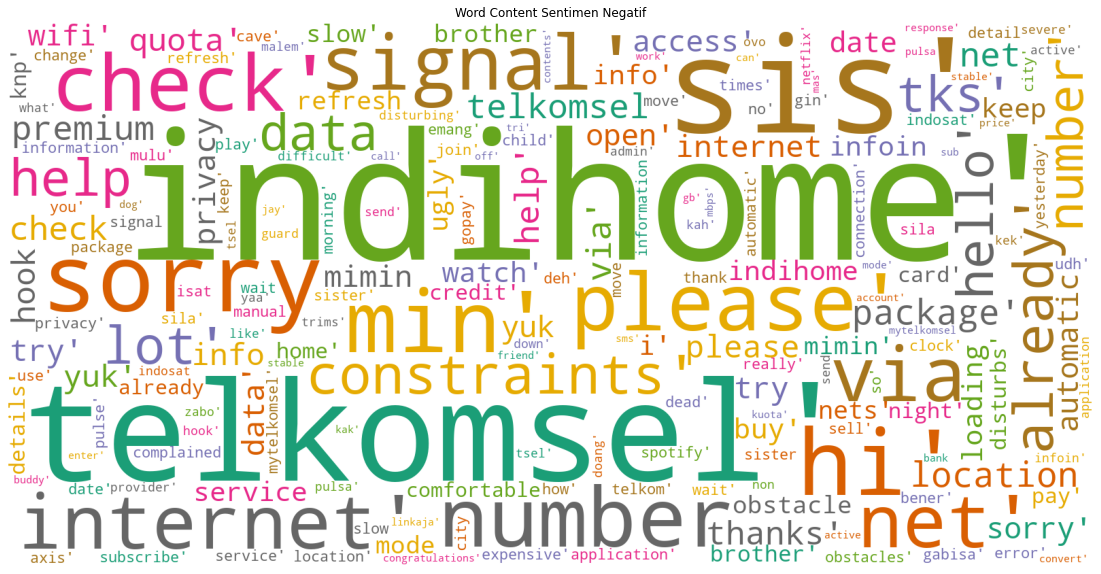

In [19]:
word_negatif = pd.Series(" ".join(df[df["polaritas"]== -1] ["tweet_english"]).split())
data_negatif = " ".join(word_negatif)

%matplotlib inline
# Unigram (per satu kata) -> "collocations = False"
wordcloud_negatif = WordCloud(background_color = "white", mode = "RGB", width = 1600, height = 800, colormap = "Dark2", collocations = False).generate(data_negatif)
plt.figure(figsize = (20, 10))
plt.title("Word Content Sentimen Negatif")
plt.imshow(wordcloud_negatif)
plt.axis("off")
plt.show()

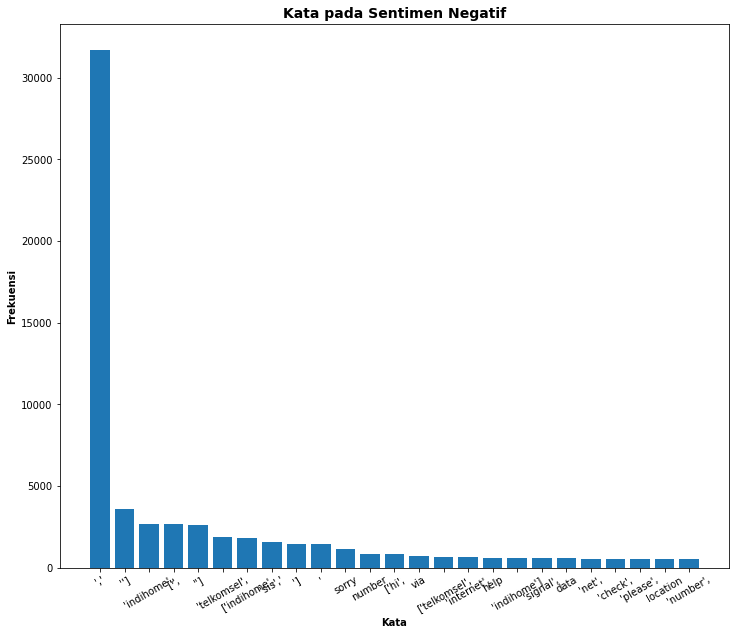

In [20]:
negatif_kata = word_negatif.value_counts().nlargest(25)

negatif_x = negatif_kata.index
negatif_y = negatif_kata.values

plt.figure(figsize = (12, 10))
plt.bar(negatif_x, negatif_y)
plt.xlabel("Kata", fontweight ='bold')
plt.ylabel("Frekuensi", fontweight ='bold')
plt.title("Kata pada Sentimen Negatif", fontweight ='bold', fontsize = 14)
plt.xticks(negatif_x, rotation = 30)
plt.show()

In [21]:
negatif_score = word_negatif.value_counts()
negatif_score

','              31711
'']               3601
'indihome',       2671
['',              2669
"]                2641
                 ...  
'ngaskas',           1
'ampoonnn']          1
['beh',              1
'huhuhu',            1
['activated',        1
Length: 19161, dtype: int64

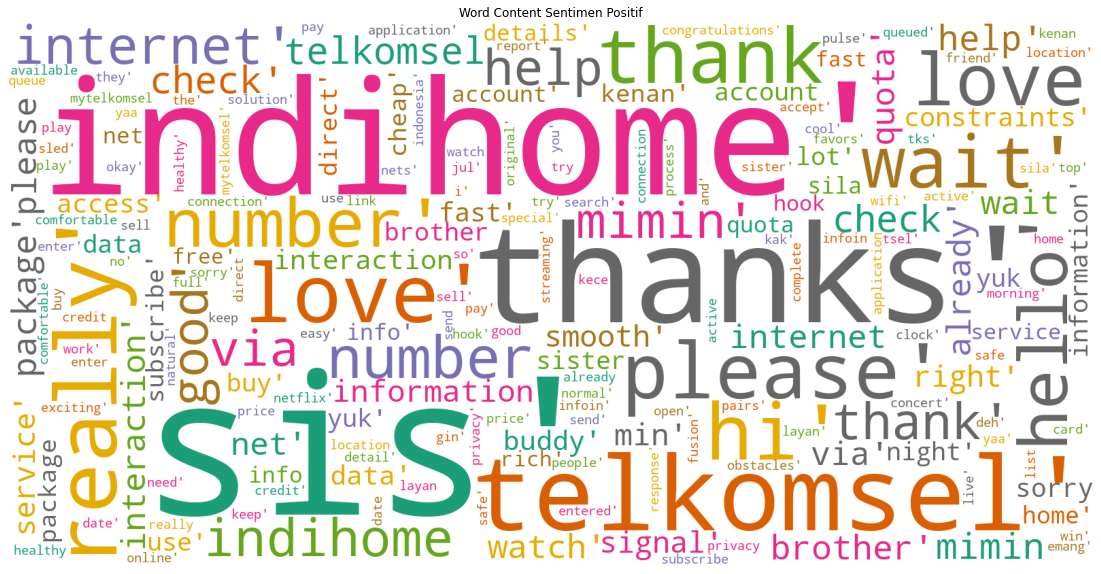

In [22]:
word_positif = pd.Series(" ".join(df[df["polaritas"]== 1] ["tweet_english"]).split())
data_positif = " ".join(word_positif)

%matplotlib inline
# Unigram (per satu kata) -> "collocations = False"
wordcloud_positif = WordCloud(background_color = "white", mode = "RGB", width = 1600, height = 800, colormap = "Dark2", collocations = False).generate(data_positif)
plt.figure(figsize = (20, 10))
plt.title("Word Content Sentimen Positif")
plt.imshow(wordcloud_positif)
plt.axis("off")
plt.show()

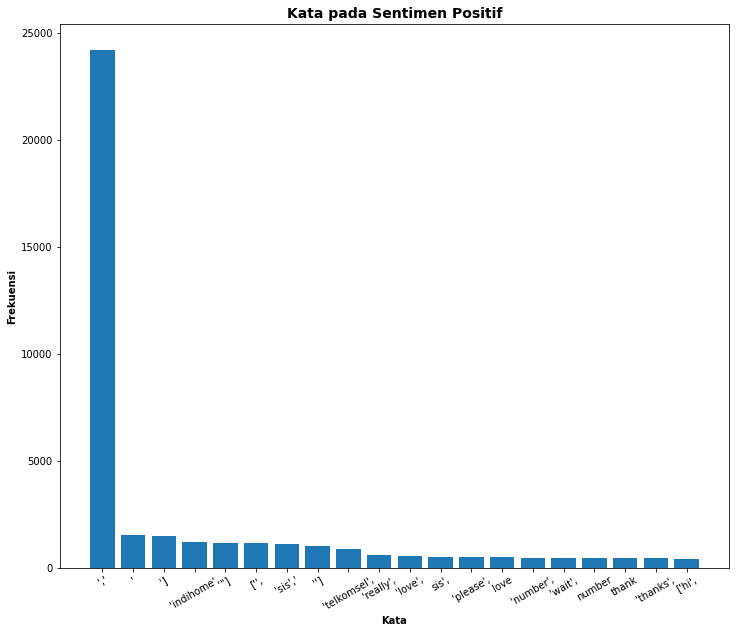

In [23]:
positif_kata = word_positif.value_counts().nlargest(20)

positif_x = positif_kata.index
positif_y = positif_kata.values

plt.figure(figsize = (12, 10))
plt.bar(positif_x, positif_y)
plt.xlabel("Kata", fontweight ='bold')
plt.ylabel("Frekuensi", fontweight ='bold')
plt.title("Kata pada Sentimen Positif", fontweight ='bold', fontsize = 14)
plt.xticks(positif_x, rotation = 30)
plt.show()

In [24]:
positif_score = word_positif.value_counts()
positif_score

','            24206
'               1503
']              1502
'indihome',     1199
"]              1166
               ...  
'isoir',           1
atmosphere         1
'wal',             1
'chindev',         1
'nder']            1
Length: 13007, dtype: int64

In [25]:
ytrain = ytrain.value_counts()
ytrain

-1    12804
 1     5201
Name: polaritas, dtype: int64

In [26]:
ytest = ytest.value_counts()
ytest

-1    3211
 1    1291
Name: polaritas, dtype: int64